### Source
from: https://www.kaggle.com/datasets/camnugent/california-housing-prices


### Content
The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. Be warned the data aren't cleaned so there are some preprocessing steps required! The columns are as follows, their names are pretty self explanitory:
1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
4. totalRooms: Total number of rooms within a block
5. totalBedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. medianHouseValue: Median house value for households within a block (measured in US Dollars)
10. oceanProximity: Location of the house w.r.t ocean/sea

### Goal
Melihat korelasi harga rumah dengan pendapatan rumah tangga

### Libraries

In [1]:
import numpy as np  
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\ACER\AppData\Local\Temp\ipykernel_9484\4131412540.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Data Preparation & EDA

In [2]:
data = pd.read_csv('housing.csv')


In [3]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


(array([ 877., 3612., 4099., 3771., 2799., 1769., 1239.,  752.,  479.,
        1243.]),
 array([ 14999. ,  63499.2, 111999.4, 160499.6, 208999.8, 257500. ,
        306000.2, 354500.4, 403000.6, 451500.8, 500001. ]),
 <BarContainer object of 10 artists>)

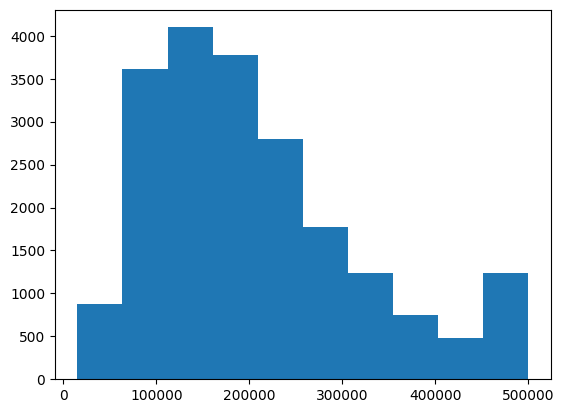

In [5]:
plt.hist(x=data['median_house_value'])

(array([ 365., 1882., 3570., 3866., 3484., 2614., 1832., 1158.,  683.,
         377.,  294.,  134.,   72.,  106.,   69.,   24.,   24.,   23.,
           6.,   57.]),
 array([ 0.4999 ,  1.22491,  1.94992,  2.67493,  3.39994,  4.12495,
         4.84996,  5.57497,  6.29998,  7.02499,  7.75   ,  8.47501,
         9.20002,  9.92503, 10.65004, 11.37505, 12.10006, 12.82507,
        13.55008, 14.27509, 15.0001 ]),
 <BarContainer object of 20 artists>)

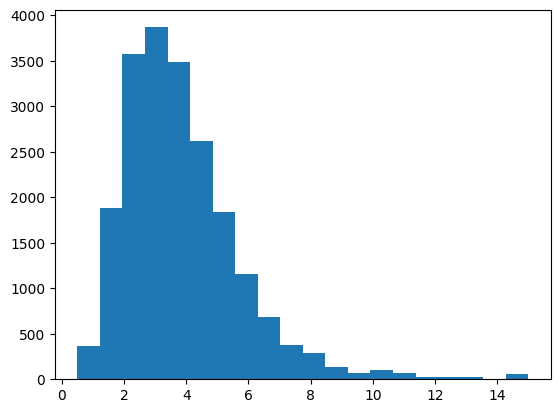

In [6]:
plt.hist(x=data['median_income'], bins=20)


#### Removing outliers sederhana untuk linear regression
Lihat dari nilai total_rooms yang tersimpang sangat jauh. Oleh karena data median_house_value terdistribusi right-skewed dan ada puncak kecil pada ujung kanan maka kita berusaha menyingkirkan data-data yang melewati upper bound dari IQR.

In [7]:
med_house_price_q1 = data['median_house_value'].quantile(0.25)
med_house_price_q3 = data['median_house_value'].quantile(0.75)
med_house_price_iqr = med_house_price_q3 - med_house_price_q1
upper_bound = med_house_price_q3 + 1.5*med_house_price_iqr

filtered_data = data[data.median_house_value <= upper_bound]

### Training

In [8]:
X = filtered_data['median_income']
X_np = np.array(X).reshape(-1,1)
y = filtered_data['median_house_value']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_np, y, test_size=0.2, random_state=0)

In [10]:
lr_model =LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

### Evaluation

In [11]:
lr_model.coef_

array([39372.90669788])

In [12]:
print("The linear model is: Y = {:.5} + {:.5}X".format(lr_model.intercept_, lr_model.coef_[0]))

The linear model is: Y = 4.6597e+04 + 3.9373e+04X


Text(0.5, 0, 'Median Income in block(10k$)')

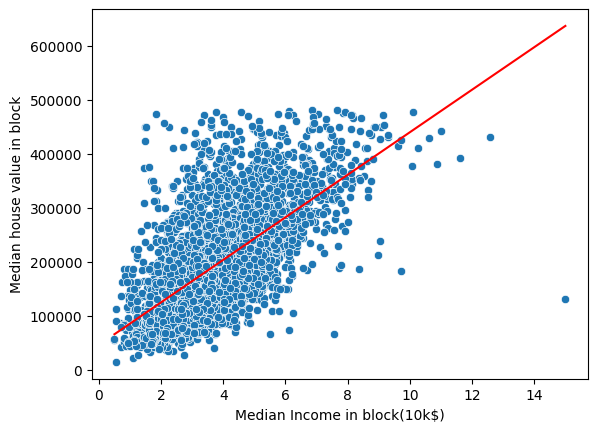

In [13]:
y_pred = lr_model.predict(X_test)


ax = plt.subplot()
sns.scatterplot(x=X_test.flatten(), y=y_test,ax=ax)
sns.lineplot(x=X_test.flatten(), y=y_pred, color='red', ax=ax)
ax.set_ylabel("Median house value in block")
ax.set_xlabel("Median Income in block(10k$)")

In [14]:
from sklearn.metrics import r2_score
lr_model.score(X_test, y_test)

0.4290921615778066